<a href="https://colab.research.google.com/github/rasecotineb/datascience/blob/master/machine-learning/Analisis_de_datos_Regresion_lineal_Machine_Learning_II_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy  as np
%ls
#Lectura del dataset
#file_name = 'sample_data/weka 1000 registros_raw data.csv'

#El método "read_csv" nos permite leer un excel
#El link compartido original es: https://drive.google.com/open?id=1kTPOY0ku4vbHF_4dxOXmxVALjFawc2MF
#Se modifica el id por uc (user control) y se agrega al final: &export=download
dataset = pd.read_csv('https://drive.google.com/uc?id=1kTPOY0ku4vbHF_4dxOXmxVALjFawc2MF&export=download')
#dataset = pd.read_csv(file_name)
dataset.shape

sample_data/


(1000, 16)

In [ ]:
dataset.dtypes

Region Comercial text         object
Subregion Comercial text      object
Sector Comercial text         object
Locacion Comercial text       object
Mesa Comercial text           object
Ruta Comercial text           object
Canal ACT text                object
Canal ISSCOM text             object
Sub Canal ISSCOM text         object
Tipo Venta Cliente text       object
Cliente text                  object
Volumen C.U                  float64
Cuota C.U                    float64
Transacciones                  int64
Precio Neto C.U S/.          float64
Importe Total Factura S/.    float64
dtype: object

#Pre-Procesamiento de datos

###Determinamos cuantos filas (registros) existen por cada columna (variable) sin contar repeticiones. Si una columna (variable) tuviera los valores [1,1,2,3,3,4] diremos que tiene 4 registros únicos que son [1,2,3,4]:

In [ ]:
dataset.nunique()

Region Comercial text          1
Subregion Comercial text       8
Sector Comercial text         11
Locacion Comercial text       21
Mesa Comercial text           41
Ruta Comercial text          285
Canal ACT text                10
Canal ISSCOM text             23
Sub Canal ISSCOM text         57
Tipo Venta Cliente text        1
Cliente text                 999
Volumen C.U                  885
Cuota C.U                    922
Transacciones                475
Precio Neto C.U S/.          404
Importe Total Factura S/.    960
dtype: int64

In [ ]:
#Porcentaje de filas (registros) únicas por cada columna (variable). Mientras más cercano el valor a 1 significa que tiene más filas (registros) únicos
dataset.nunique() / len(dataset)

Region Comercial text        0.001
Subregion Comercial text     0.008
Sector Comercial text        0.011
Locacion Comercial text      0.021
Mesa Comercial text          0.041
Ruta Comercial text          0.285
Canal ACT text               0.010
Canal ISSCOM text            0.023
Sub Canal ISSCOM text        0.057
Tipo Venta Cliente text      0.001
Cliente text                 0.999
Volumen C.U                  0.885
Cuota C.U                    0.922
Transacciones                0.475
Precio Neto C.U S/.          0.404
Importe Total Factura S/.    0.960
dtype: float64

###Revisamos si las filas (registros) tienen nulos o no:

In [ ]:
dataset.isna()==True

,Region Comercial text,Subregion Comercial text,Sector Comercial text,Locacion Comercial text,Mesa Comercial text,Ruta Comercial text,Canal ACT text,Canal ISSCOM text,Sub Canal ISSCOM text,Tipo Venta Cliente text,Cliente text,Volumen C.U,Cuota C.U,Transacciones,Precio Neto C.U S/.,Importe Total Factura S/.
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


###Determinamos cuantas filas (registros) vacías existen en cada columna (variable) sumando todos sus valores "True" que indican nulidad:

In [ ]:
#Cantidad de filas (registros) vacías por cada columna (variable)
dataset.isna().sum()


Region Comercial text         0
Subregion Comercial text      0
Sector Comercial text         0
Locacion Comercial text       0
Mesa Comercial text           0
Ruta Comercial text           0
Canal ACT text                0
Canal ISSCOM text             0
Sub Canal ISSCOM text         0
Tipo Venta Cliente text       0
Cliente text                  0
Volumen C.U                  34
Cuota C.U                     0
Transacciones                 0
Precio Neto C.U S/.           0
Importe Total Factura S/.    34
dtype: int64

In [ ]:
#Porcentaje de filas (registros) vacías por cada columna (variable). Cuanto más cercano el valor a 1 significa que tiene más filas (registros) vacías
dataset.isna().sum() / len(dataset)

Region Comercial text        0.000
Subregion Comercial text     0.000
Sector Comercial text        0.000
Locacion Comercial text      0.000
Mesa Comercial text          0.000
Ruta Comercial text          0.000
Canal ACT text               0.000
Canal ISSCOM text            0.000
Sub Canal ISSCOM text        0.000
Tipo Venta Cliente text      0.000
Cliente text                 0.000
Volumen C.U                  0.034
Cuota C.U                    0.000
Transacciones                0.000
Precio Neto C.U S/.          0.000
Importe Total Factura S/.    0.034
dtype: float64

###Filtramos las columnas (variables) cuyo porcentaje de filas (registros) únicos sea cercano a 1 porque lo más probable es que sean identificadores (IDs), hecho que normalmente no aporta información respecto a un objetivo como puede ser predecir los valores de una columna (variable) y por ende son considerados como ruido:

In [ ]:
#Determinamos aquellas filas (registros) que tengan un porcentaje de unicos mayor al valor de 0.7
threshold = 0.7

unique_percentages = dataset.nunique() / len(dataset)

criteria = unique_percentages > threshold

columns_to_filter = unique_percentages[criteria].keys()
columns_to_filter

Index(['Cliente text', 'Volumen C.U', 'Cuota C.U',
       'Importe Total Factura S/.'],
      dtype='object')

In [ ]:
arreglo = (x for x in columns_to_filter)
print (list(arreglo)[0:2])
#index , y = enumerate(columns_to_filter)
list(columns_to_filter[0:2])


['Cliente text', 'Volumen C.U']


['Cliente text', 'Volumen C.U']

In [ ]:
#Eliminamos las columnas (variables) seleccionadas en el paso anterior. Al aplicar "drop" obtenemos un nuevo "DataFrame", pero con el parámetro
#inplace igual a "True" podemos realizar dicha operación de eliminación y sobre-escribir el "DataFrame" del cual estamos eliminando con el
#nuevo "DataFrame" obtenido. El parámetro axis permite seleccionar el eje respecto al cual aplicar la operación "drop". Los valores válidos
#son [0 o "index"] y [1 o "Después de eliminar las columnas (variables) cuyo porcentaje de filas (registros) únicos sea cercano a 1 procedemos a 
#eliminar las filas (registros) duplicadas.

#Si ejecutáramos esto antes del paso anterior terminaríamos eliminando menos o ninguna fila (registro) debido que estas se diferenciarían entre sí 
#mediante las columnas (variables) cuyo porcentaje de filas (registros) únicos sea cercano a 1. Por ejemplo, si tuvieramos el siguiente dataset y 
#tratáramos de eliminar los duplicados no pasaría nada:

# A	B	C
# 1	h	i
# 2	j	k
# 3	h	i
# Pero si elimináramos la columna A y eliminarámos duplicados obtendríamos el siguiente dataset:

# B	C
# h	i
# j	k
# El procedimiento de eliminar duplicados también considera los nulos para determinar si una fila es distinta o no de otra:columns"]

#dataset.drop(columns_to_filter[0], axis=1, inplace=True)
dataset.drop(list(columns_to_filter[0:2]), axis=1, inplace=True)  #Elimina Cliente_text y Volumen_CU

dataset

,Region Comercial text,Subregion Comercial text,Sector Comercial text,Locacion Comercial text,Mesa Comercial text,Ruta Comercial text,Canal ACT text,Canal ISSCOM text,Sub Canal ISSCOM text,Tipo Venta Cliente text,Cuota C.U,Transacciones,Precio Neto C.U S/.,Importe Total Factura S/.
0,REGION CENTRO ORIENTE,Sub. Centro,Centro 2,71 BAJOPONTINA HUANCAYO,71SV05,71H57,Tradicional,VIV.LOCALES TRADICIONALES,BODEGAS,INDIRECTO,22.02,227,10.34,429.90
1,REGION CENTRO ORIENTE,Sub. Centro,Centro 2,71 BAJOPONTINA HUANCAYO,71SV05,71H52,Comer y Beber,RESTAURANT,POLLERIAS,INDIRECTO,11.89,147,11.70,341.73
2,REGION CENTRO ORIENTE,Sub. Centro,Centro 2,57 BAJOPONTINA HUANCAVELICA,57SV01,57H03,Comer y Beber,VENTA AL PASO,CARRETILLAS,INDIRECTO,0.00,151,9.72,247.60
3,REGION CENTRO ORIENTE,Sub. Ayacucho,AYACUCHO 1,46 MORVISA AYACUCHO,46SV02,46H12,Comercios Minoristas,LICORERIAS,BEBIDAS EN GENERAL,INDIRECTO,9.37,126,10.47,276.58
4,REGION CENTRO ORIENTE,Sub. ICA,Ica 1,I3 ECOBESA ICA,I3SV02,I3H12,Tradicional,VIV.LOCALES TRADICIONALES,BODEGAS,INDIRECTO,24.60,267,9.41,649.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,REGION CENTRO ORIENTE,Sub. ICA,Ica 1,I3 ECOBESA ICA,I3SV01,I3H07,Tradicional,VIV.LOCALES TRADICIONALES,HOGARES/PARTICULARES,INDIRECTO,43.75,164,10.71,498.13
996,REGION CENTRO ORIENTE,Sub. Selva Central,Selva Central 2,47 TRAHIS LA MERCED,47SV01,47H03,Comercios Minoristas,LICORERIAS,BEBIDAS EN GENERAL,INDIRECTO,7.43,0,0.00,NaN
997,REGION CENTRO ORIENTE,Sub. ICA,Ica 1,I3 ECOBESA ICA,I3SV01,I3H03,Comercios Minoristas,VENTAS SERVICIOS ESPECIALIZADO,OTRAS VENTAS Y SERVICIOS,INDIRECTO,20.53,60,8.76,142.17
998,REGION CENTRO ORIENTE,Sub. Selva Central,Selva Central 1,27 HUALLPA PASCO,27SV01,27H02,Tradicional,VIV.LOCALES TRADICIONALES,BODEGAS,INDIRECTO,28.16,547,11.10,885.35


In [ ]:
#Al aplicar "drop_duplicates" obtenemos un nuevo "DataFrame", pero con el parámetro inplace igual a "True" podemos realizar dicha operación de
#eliminación y sobre-escribir el "DataFrame" del cual estamos eliminando con el nuevo "DataFrame" obtenido
dataset.drop_duplicates(keep="first", inplace=True)

#Elimina Transacciones
#dataset.drop(['Transacciones'],axis=1,inplace=True)

#Revisamos cuantas filas y columnas tiene el dataset después de eliminar los duplicados
dataset.shape

(1000, 14)

In [ ]:
#Determinamos que columnas (variables) son del tipo númerico y cuales son categóricas para poder usar esta información más adelante: 
numeric_columns = list()
categorical_columns = list()
dictionary_of_columns_with_index_to_categorical = dict()
dictionary_of_columns_with_categorical_to_index = dict()

for column in dataset:
  #Determinamos si la columna es numérica o no
  if pd.api.types.is_numeric_dtype(dataset[column]):
    numeric_columns.append(column)
  else:
    #Modificamos el tipo de dato de la columna (variable) mediante "astype"
    dataset[column] = dataset[column].astype("category")

    #Verificamos si el tipo de dato de la columna (variable) fue transformado a categórico correctamente
    if not pd.api.types.is_categorical_dtype(dataset[column]):
      raise Exception("La columna {} no se transformó correctamente a categórica".format(column))

    dictionary_of_columns_with_index_to_categorical[column] = dict()
    dictionary_of_columns_with_categorical_to_index[column] = dict()
    
    #Indexamos los valores (categorías), sin tomar en consideración los nulos, de la columna (variable) y guardamos esa información en los diccionarios
    for index, category in enumerate(dataset[column].cat.categories):
      dictionary_of_columns_with_index_to_categorical[column][index] = category
      dictionary_of_columns_with_categorical_to_index[column][category] = index
    
    categorical_columns.append(column)

In [ ]:
numeric_columns

['Cuota C.U',
 'Transacciones',
 'Precio Neto C.U S/.',
 'Importe Total Factura S/.']

In [ ]:
categorical_columns

['Region Comercial text',
 'Subregion Comercial text',
 'Sector Comercial text',
 'Locacion Comercial text',
 'Mesa Comercial text',
 'Ruta Comercial text',
 'Canal ACT text',
 'Canal ISSCOM text',
 'Sub Canal ISSCOM text',
 'Tipo Venta Cliente text']

In [ ]:
#Visualizamos el tipo de dato de las columnas (variables) para validar que las no numéricas se transformaron a categóricas
dataset.dtypes

Region Comercial text        category
Subregion Comercial text     category
Sector Comercial text        category
Locacion Comercial text      category
Mesa Comercial text          category
Ruta Comercial text          category
Canal ACT text               category
Canal ISSCOM text            category
Sub Canal ISSCOM text        category
Tipo Venta Cliente text      category
Cuota C.U                     float64
Transacciones                   int64
Precio Neto C.U S/.           float64
Importe Total Factura S/.     float64
dtype: object

###Nos encargamos de las filas (registros) con nulos para las variables numéricas. Para esto podemos eliminar dichas filas (registros) o reemplazarlas con algún valor que puede ser la media, mediana, moda.

Un criterio que suele usarse para decidir eliminar las filas (registros) es que estas representen un porcentaje pequeño de todo el dataset:

In [ ]:
#Porcentaje de filas (registros) vacías por cada columna (variable) numérica
dataset[numeric_columns].isna().sum() / len(dataset)

Cuota C.U                    0.000
Transacciones                0.000
Precio Neto C.U S/.          0.000
Importe Total Factura S/.    0.034
dtype: float64

In [ ]:
#Optamos por reemplazar los nulos con algún valor para la columna (variable) "Importe Total Factura S/." debido que tiene un porcentaje de nulos cercano al 4% en todo el dataset.

#Se decide usar la mediana para reemplazar los nulos. Como veremos a continuación, por más que indiquemos obtener la mediana en todo el dataset sólo obtendremos
#la mediana de aquellas columnas (variables) que son numéricas
dataset[numeric_columns].median()

Cuota C.U                     25.22
Transacciones                177.00
Precio Neto C.U S/.           11.16
Importe Total Factura S/.    381.95
dtype: float64

In [ ]:
#Podemos reemplazar los nulos con la mediana en todo el dataset y sólo se reemplazarán las columnas (variables) numéricas. Sin embargo, por formalidad procederemos
#a reemplazar los nulos con la mediana sólo de aquellas columnas (variables) numéricas
median_of_numeric_columns = dataset[numeric_columns].median()

dataset[numeric_columns] = dataset[numeric_columns].fillna(median_of_numeric_columns)

In [ ]:
#Verificamos que el porcentaje de filas (registros) vacías para las columnas (variables) numéricas es 0
dataset[numeric_columns].isna().sum() / len(dataset)

Cuota C.U                    0.0
Transacciones                0.0
Precio Neto C.U S/.          0.0
Importe Total Factura S/.    0.0
dtype: float64

In [ ]:
#dataset.to_csv("weka 1000 registros_raw data_depurado.csv")

In [ ]:
#Cuantos registros de "Subregion Comercial text" = "Sub. Ayacucho" hay
dataset.loc[(dataset['Subregion Comercial text']=='Sub. Ayacucho')].iloc[:,2].count()

57

In [ ]:
dataset

In [ ]:
#Convierte las variables categoricas en numericas ONE-HOT-ENCODING
dataset_dummy = pd.get_dummies(data=dataset,columns=categorical_columns, drop_first=False)
dataset_dummy.describe()

,Cuota C.U,Transacciones,Precio Neto C.U S/.,Importe Total Factura S/.,Region Comercial text_REGION CENTRO ORIENTE,Subregion Comercial text_Sub. Ayacucho,Subregion Comercial text_Sub. Centro,Subregion Comercial text_Sub. ICA,Subregion Comercial text_Sub. Nor Oriente,Subregion Comercial text_Sub. Norte Chico,Subregion Comercial text_Sub. Oriente,Subregion Comercial text_Sub. Selva Alta,Subregion Comercial text_Sub. Selva Central,Sector Comercial text_AYACUCHO 1,Sector Comercial text_Centro 2,Sector Comercial text_Ica 1,Sector Comercial text_Nor Oriente 1,Sector Comercial text_Nor Oriente 2,Sector Comercial text_Norte Chico 1,Sector Comercial text_Oriente 1,Sector Comercial text_Selva Alta 1,Sector Comercial text_Selva Alta 2,Sector Comercial text_Selva Central 1,Sector Comercial text_Selva Central 2,Locacion Comercial text_07 DISTRAROJ TARMA,Locacion Comercial text_08 TRAHIS PICHANAKI,Locacion Comercial text_14 LAS DUNAS NAZCA,Locacion Comercial text_24 IMPERIOS HUACHO,Locacion Comercial text_27 HUALLPA PASCO,Locacion Comercial text_28 IMPERIOS HUARAL,Locacion Comercial text_46 MORVISA AYACUCHO,Locacion Comercial text_47 TRAHIS LA MERCED,Locacion Comercial text_57 BAJOPONTINA HUANCAVELICA,Locacion Comercial text_63 SANTA MONICA TARAPOTO,Locacion Comercial text_71 BAJOPONTINA HUANCAYO,Locacion Comercial text_72 TRAHIS PUCALLPA,Locacion Comercial text_74 DISELVA TINGO MARIA,Locacion Comercial text_76 DISELVA HUANUCO,Locacion Comercial text_83 CONSUELO CANALES PUQUIO,Locacion Comercial text_97 TRAHIS SATIPO,...,Sub Canal ISSCOM text_EST.SERVIC.INDEPENDI C/MART,Sub Canal ISSCOM text_EST.SERVIC.INDEPENDI S/MART,Sub Canal ISSCOM text_ESTADIOS/COLISEOS,Sub Canal ISSCOM text_FERRETERIA/HERRAMIENTAS,Sub Canal ISSCOM text_FRUTERIA/VERDULERIA,Sub Canal ISSCOM text_HAMBURGUESA,Sub Canal ISSCOM text_HOGARES/PARTICULARES,Sub Canal ISSCOM text_HOTELES/MOTEL/POSADA,Sub Canal ISSCOM text_KIOSKOS,Sub Canal ISSCOM text_LAVANDERIA/TINTORERIA,Sub Canal ISSCOM text_LIBRERIAS/REVISTAS/TABAQ.,Sub Canal ISSCOM text_LICORES/CERVERZA/VINOS,Sub Canal ISSCOM text_MAYORISTAS,Sub Canal ISSCOM text_MINIMARKET INDEPENDIENTE,Sub Canal ISSCOM text_NEGOCIOS EN MERCADOS,Sub Canal ISSCOM text_OFICINAS DE NEGOCIOS PROFESI,Sub Canal ISSCOM text_OTRAS VENTAS Y SERVICIOS,Sub Canal ISSCOM text_OTROS ALOJAMIENTOS,Sub Canal ISSCOM text_OTROS COMIDAS RAPIDAS,Sub Canal ISSCOM text_OTROS RESTAURANTES,Sub Canal ISSCOM text_OTROS SISTEMAS DE TRANSPORTE,Sub Canal ISSCOM text_OTROS VIVERES ESPEC.,Sub Canal ISSCOM text_OTROS(GIMNASIOS),Sub Canal ISSCOM text_PANADERIA/PASTELERIA,Sub Canal ISSCOM text_PARQUES/PICNIC/BALNEARIOS,Sub Canal ISSCOM text_PELUQUERIA/SALON DE BELLEZA,Sub Canal ISSCOM text_PESCADOS Y MARISCOS,Sub Canal ISSCOM text_PIZZA,Sub Canal ISSCOM text_PLAYAS DE ESTACIONAMIENTO,Sub Canal ISSCOM text_POLLERIAS,Sub Canal ISSCOM text_PUBS,Sub Canal ISSCOM text_RESTAURANTE FINO CATEGORIA,Sub Canal ISSCOM text_RESTAURANTES CATEGORIA MEDIA,Sub Canal ISSCOM text_SECUNDARIA/POLIMODAL,Sub Canal ISSCOM text_SERVIC.PROFESION.PARA OF.,Sub Canal ISSCOM text_SERVICIO AUTOMOTRIZ,Sub Canal ISSCOM text_TERMINAL TERRESTRE,Sub Canal ISSCOM text_TRANSPORTE PUBLICO,Sub Canal ISSCOM text_VIDEO CLUB,Tipo Venta Cliente text_INDIRECTO
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,

#Feature Engineering

In [ ]:
# Columnas de REGION COMERCIAL y TIPO VENTA CLIENTE tienen un unico valor y se eliminan
# dataset_dummy.drop(columns=['Region Comercial text_REGION CENTRO ORIENTE','Tipo Venta Cliente text_INDIRECTO'],inplace = True)
# df = pd.DataFrame(dataset_dummy).describe()
# df2 = pd.DataFrame(df.iloc[2])
# df2[df2['std']==0].T
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit_transform(dataset_dummy)   #Va a eliminar aquellas características con poca o nula varianza (datos con poca variabilidad)
indices = selector.get_support()        #Obtiene la matriz booleana con el resultado de seleccion de las variables conservadas (TRUE) y eliminadas (FALSE)

eliminados = np.where(indices == False) #Obtiene los indices de las variables (columnas) eliminadas 
dataset_dummy.columns[eliminados]       #Muestra cuales han sido las columnas eliminadas


Index(['Region Comercial text_REGION CENTRO ORIENTE', 'Tipo Venta Cliente text_INDIRECTO'], dtype='object')

In [ ]:
from sklearn.feature_selection import mutual_info_regression
X = dataset_dummy.drop(columns='Importe Total Factura S/.')
y = dataset_dummy['Importe Total Factura S/.']  #Target
feature = mutual_info_regression(X,y)   #Feature selection para calculo de variable continua por regresion
arr_ind = feature.argsort()[-10:][::-1] #Obtiene los indices de las 10 variables explicativas con mayor valor, las ordena de mayor a menor
print(feature[arr_ind],arr_ind)         #Imprime los maximos valores del MUTUAL_INFO_REGRESSION y sus respectivos indices
print(X.columns[arr_ind])               #Nombre de las variables (columnas) que finalmente se van a considerar


[1.23201267 0.64487626 0.12258002 0.0256452  0.02178873 0.02022733
 0.01905815 0.01789465 0.01763427 0.01664546] [  1   0   2  32   8 402 370  15  46 395]
Index(['Transacciones', 'Cuota C.U', 'Precio Neto C.U S/.',
       'Locacion Comercial text_63 SANTA MONICA TARAPOTO',
       'Subregion Comercial text_Sub. Norte Chico',
       'Canal ISSCOM text_VIV.LOCALES TRADICIONALES',
       'Canal ACT text_Comer y Beber', 'Sector Comercial text_Nor Oriente 1',
       'Mesa Comercial text_14SV01', 'Canal ISSCOM text_RESTAURANT'],
      dtype='object')


In [ ]:
X_featured = dataset_dummy[X.columns[arr_ind]]
X_featured

,Transacciones,Cuota C.U,Precio Neto C.U S/.,Locacion Comercial text_63 SANTA MONICA TARAPOTO,Subregion Comercial text_Sub. Norte Chico,Canal ISSCOM text_VIV.LOCALES TRADICIONALES,Canal ACT text_Comer y Beber,Sector Comercial text_Nor Oriente 1,Mesa Comercial text_14SV01,Canal ISSCOM text_RESTAURANT
0,227,22.02,10.34,0,0,1,0,0,0,0
1,147,11.89,11.70,0,0,0,1,0,0,1
2,151,0.00,9.72,0,0,0,1,0,0,0
3,126,9.37,10.47,0,0,0,0,0,0,0
4,267,24.60,9.41,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,164,43.75,10.71,0,0,1,0,0,0,0
996,0,7.43,0.00,0,0,0,0,0,0,0
997,60,20.53,8.76,0,0,0,0,0,0,0
998,547,28.16,11.10,0,0,1,0,0,0,0


#Modelo de Regresion Lineal Múltiple

In [ ]:
from sklearn import datasets,linear_model, preprocessing
from sklearn.model_selection import train_test_split
# Separamos la variable Target de las demás variables
# X = dataset_dummy.drop(columns='Importe Total Factura S/.')
# y = dataset_dummy['Importe Total Factura S/.']  #Target


#pd.DataFrame(X).describe()
#pd.DataFrame(X[0]).boxplot(figsize=(15,190))





In [ ]:
#Separamos data de entrenamiento y de test
X_train, X_test, y_train,y_test = train_test_split(X_featured,y,test_size=0.33)
#Normalizamos datos (features)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train= scaler.transform(X_train)
X_test = scaler.transform(X_test)
#pd.DataFrame(X_test).describe()
# X_test = pd.DataFrame(X_test)
# X_train = pd.DataFrame(X_train)
# X_test.describe()


In [ ]:
print('',X_test.shape,y_test.shape,'\n',X_train.shape,y_train.shape)

 (330, 10) (330,) 
 (670, 10) (670,)


In [ ]:
#Seteo del modelo de regresion lineal
lr_multiple = linear_model.LinearRegression()
#entrenamiento del modelo
lr_multiple.fit(X_train,y_train)

y_prediction   = lr_multiple.predict(X_train)
score_r2_train = lr_multiple.score(X_train,y_train)
score_r2_test  = lr_multiple.score(X_test,y_test)
coeficientes   = lr_multiple.coef_
intercepto     = lr_multiple.intercept_

i = 0
print('Real: {}'.format(y_train.iloc[i]))
print('Predicción: {}'.format(y_prediction[i]))
y = np.dot(X_train[i],coeficientes) + intercepto

print('Verificacion de prediccion: {}'.format(y))
print('R2 Train: {:.5f}, R2 Test: {:.5f}'.format(score_r2_train,score_r2_test))
print('Intercepto: {:.5f}, Coeficientes: {}'.format(intercepto, coeficientes))

# plt.figure(figsize=(20,20))
# plt.scatter(y_prediction,y_test,)
# plt.title('Predicción vs Real')
# plt.xlabel("Prediccion")
# plt.ylabel("Real")
# plt.show()


Real: 811.11
Predicción: 581.1179229401614
Verificacion de prediccion: 581.8857422076748
R2 Train: 0.82853, R2 Test: 0.90208
Intercepto: 661.93839, Coeficientes: [ 6.74985118e+02  2.93358907e+02 -6.67892596e+01 -2.10181808e+16
 -2.22291584e+01 -6.45969558e+00 -2.91549438e+01  2.10181808e+16
  1.66547651e+01  2.52745896e+01]


##Regresión LASSO

In [ ]:
#Seteo del modelo de regresion lineal LASSO
lr_lasso = linear_model.Lasso(fit_intercept=True)
#entrenamiento del modelo
lr_lasso.fit(X_train,y_train)

y_prediction   = lr_lasso.predict(X_train)
score_r2_train = lr_lasso.score(X_train,y_train)
score_r2_test  = lr_lasso.score(X_test,y_test)
coeficientes   = lr_lasso.coef_
intercepto     = lr_lasso.intercept_

print(y_train.iloc[0])
print(y_prediction[0])
y = np.dot(X_train[0],coeficientes) + intercepto

print(y)

#coeficientes    = coeficientes[coeficientes !=0]
# print(y_prediction)
print('R2 Train: {:.5f}, R2 Test: {:.5f}'.format(score_r2_train,score_r2_test),'\n', 'Intercepto: {:.5f}, Coeficientes: {}'.format(intercepto, coeficientes))

# plt.figure(figsize=(20,20))
# plt.scatter(y_prediction,y_test,)
# plt.title('Predicción vs Real')
# plt.xlabel("Prediccion")
# plt.ylabel("Real")
# plt.show()


811.11
581.7274226219046
581.7274226219046
R2 Train: 0.82856, R2 Test: 0.90328 
 Intercepto: 661.93839, Coeficientes: [674.86748672 291.65672215 -66.19703411 -14.00680121 -20.37247839
  -9.45475316 -20.68621829  -3.35667513  16.0811426   21.42546049]


#Modelo de Regresion SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

Cs = np.logspace(-4,4,9)  # ~ [0.01, 0.03, 0.1, ..., 10000]
gammas = np.logspace(-2,2,9)  # [0.0001, 0.001, ..., 100]

mejor_svr = None
mejor_score = 0
for C in Cs:
    for gamma in gammas:
        
        svr = SVR(kernel='rbf', C=C, gamma=gamma, epsilon = 0.2) 
        svr.fit(X_train, y_train)
        
        score_val = svr.score(X_test, y_test)
        
        if score_val > mejor_score:
            mejor_score = score_val
            mejor_svr = svr

            


print ('Mejor valor de C: %0.4f' % mejor_svr.get_params()['C'])
print ('Mejor valor de gamma: %0.4f' % mejor_svr.get_params()['gamma'])
print ('Exactitud en el conjunto de entrenamiento: %0.4f' % mejor_svr.score(X_train, y_train))
print ('Exactitud en el conjunto de validación: %0.4f' % mejor_svr.score(X_test, y_test))



# model = SVR(kernel='rbf', C=10000.0, epsilon=0.1)
# model.fit(X_train, y_train)
# score_train = model.score(X_train, y_train)
# score_val = model.score(X_test, y_test)

# print ('Exactitud en el conjunto de entrenamiento: %0.4f' % score_train)
# print ('Exactitud en el conjunto de validación: %0.4f' % score_val)


Mejor valor de C: 10000.0000
Mejor valor de gamma: 0.0100
Exactitud en el conjunto de entrenamiento: 0.8720
Exactitud en el conjunto de validación: 0.8892


#Modelo de Regresion Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
mejor_rf = None
mejor_score = 0
# Busqueda secuencial de los mejores parametros
for n_estimator in range(1,100,1):
    for max_depth in range(2,10,1):
        
        rf = RandomForestRegressor(n_estimators = n_estimator, max_depth=max_depth, random_state=0)
        rf.fit(X_train, y_train)
        
        score_val = rf.score(X_test, y_test)
        
        if score_val > mejor_score:
            mejor_score = score_val
            mejor_rf = rf

            


print ('Mejor valor de n_estimators: %0.4f' % mejor_rf.get_params()['n_estimators'])
print ('Mejor valor de max_depth: %0.4f' % mejor_rf.get_params()['max_depth'])
print ('Exactitud en el conjunto de entrenamiento: %0.4f' % mejor_rf.score(X_train, y_train))
print ('Exactitud en el conjunto de validación: %0.4f' % mejor_rf.score(X_test, y_test))



Mejor valor de n_estimators: 5.0000
Mejor valor de max_depth: 5.0000
Exactitud en el conjunto de entrenamiento: 0.9389
Exactitud en el conjunto de validación: 0.9477


#Modelos de Ensamble - Regresión

In [ ]:
from sklearn.ensemble import VotingRegressor


#La lista weights contiene los pesos de los clasificadores de regresión
eclf = VotingRegressor(estimators=[('lr', lr_multiple), ('lr_lasso', lr_lasso), ('svr', mejor_svr), 
                                    ('rf', mejor_rf)], weights=[2, 3, 5, 4])
eclf.fit(X_train,y_train)

#Precision de los modelos sobre el dataset de test
print ("Exactitud del modelo de regresión lineal      :", lr_multiple.score(X_test, y_test))
print ("Exactitud del modelo de regresión lasso       :", lr_lasso.score(X_test, y_test))
print ("Exactitud del modelo de SVR                   :", mejor_svr.score(X_test, y_test))
print ("Exactitud del modelo random forest            :", mejor_rf.score(X_test, y_test))
print ("Exactitud del modelo de ensamble por votación :", eclf.score(X_test, y_test))

Exactitud del modelo de regresión lineal      : 0.902076358017937
Exactitud del modelo de regresión lasso       : 0.9032810518962526
Exactitud del modelo de SVR                   : 0.8891560774465346
Exactitud del modelo random forest            : 0.9476728680648052
Exactitud del modelo de ensamble por votación : 0.9493594016228307


#Gradient Boosting - Regresión

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_absolute_error

from pprint import pprint

lr = 1
#El criterio paa
gb = GradientBoostingRegressor(learning_rate=lr, criterion='mae', n_estimators=100, random_state=0)
gb.fit(X_train, y_train)

# Se obtiene el error medio absoluto (MAE) de cada una de las iteraciones (n_estimators)
errors = [(mean_absolute_error(y_test, y_pred))
          for y_pred in gb.staged_predict(X_test)]
print("Los errores incurridos por los sucesivos ensambles de árboles son:", errors)

bst_n_estimators = np.argmin(errors) + 1   #El mejor modelo es el que tiene menor error absoluto promedio
min_error = np.min(errors)                 #Menor valor MAE


print('Total de iteraciones: {}'.format(len(errors)))                    #Total de errores, uno por cada ensamble
print('Mejor iteración del GradientBoost: {}'.format(bst_n_estimators))  #Mejor iteración
print('Menor error: {}'.format(errors[bst_n_estimators-1]))              #Imprime el error
print('Menor error: {} \n'.format(min_error))                            #Imprime el error

gb_best = GradientBoostingRegressor(learning_rate=lr, criterion='mae', n_estimators=bst_n_estimators, random_state=0)
gb_best.fit(X_train, y_train)

print('Los hiperparámetros del mejor modelo son:')
pprint(gb_best.get_params())
print()

print('Exactitud de GradientBoosting en entrenamiento (R2-score):', gb_best.score(X_train, y_train))
print('Exactitud de GradientBoosting en validación (R2-score):', gb_best.score(X_test, y_test))

Los errores incurridos por los sucesivos ensambles de árboles son: [150.2370303030303, 147.2309696969697, 141.1606363636364, 143.0499356060606, 142.70807575757576, 138.52323863636363, 139.5148181818182, 142.6420681818182, 142.85723674242425, 143.0779678030303, 143.7034034090909, 144.0610729166667, 143.83008049242423, 143.8887301136364, 143.98064157196973, 144.02354876893938, 144.83148153409093, 147.16984706439396, 146.8258636363636, 148.1106957859848, 148.0752258522727, 148.21289015151513, 148.8485991950757, 148.99626763731058, 148.83110002367422, 150.31465565814398, 149.41277734375004, 149.67604580965912, 149.39118241003789, 149.47786600378788, 149.41911115056817, 149.82920750473488, 149.85750174597538, 150.19600571141103, 150.5881429036459, 151.8094751716383, 151.76702832031253, 152.9231552734374, 152.9140368134468, 152.69846753669506, 151.21506210049714, 153.056490271366, 153.0938639914772, 153.01066039299243, 153.63269868607952, 153.33506480823857, 153.18531659860324, 154.004608575

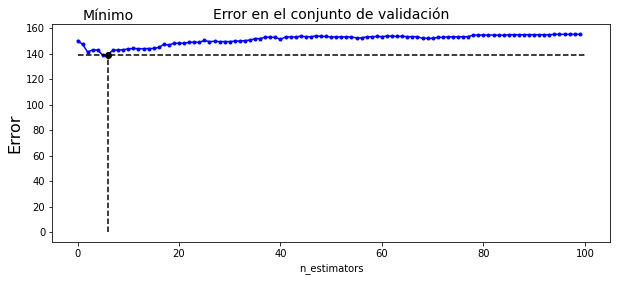

In [ ]:
plt.figure(figsize=(10, 4))

plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 100], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Mínimo", ha="center", fontsize=14)
plt.xlabel("n_estimators")
plt.ylabel("Error", fontsize=16)
plt.title("Error en el conjunto de validación", fontsize=14)
plt.show()

#ADABoost - Regresión

In [ ]:
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree     import DecisionTreeRegressor
from sklearn.datasets import make_regression

lr = 0.1
ab = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10,criterion='mae'),learning_rate=lr, n_estimators=500,random_state=0)
#ab = AdaBoostRegressor(learning_rate=lr, n_estimators=5,random_state=0)
ab.fit(X_train, y_train)

# Se obtiene el error medio absoluto (MAE) de cada una de las iteraciones (n_estimators)
errors = [(median_absolute_error(y_test, y_pred))
          for y_pred in ab.staged_predict(X_test)]
print("Los errores incurridos por los sucesivos ensambles de árboles son:", errors)

bst_n_estimators = np.argmin(errors) + 1   #El mejor modelo es el que tiene menor error absoluto promedio
min_error = np.min(errors)                 #Menor valor MAE

print(ab.score(X_test,y_test))
print('Total de iteraciones: {}'.format(len(errors)))                 #Total de errores, uno por cada ensamble
print('Mejor iteración del ADABoost: {}'.format(bst_n_estimators))    #Mejor iteración
print('Menor error: {}'.format(errors[bst_n_estimators-1]))           #Imprime el error
print('Menor error: {} \n'.format(min_error))                         #Imprime el error


ab_best = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=10, criterion='mae'),learning_rate=lr, n_estimators=bst_n_estimators, random_state=0)
#ab_best = AdaBoostRegressor(learning_rate=lr, n_estimators=bst_n_estimators, random_state=0)
ab_best.fit(X_train, y_train)

print('Los hiperparámetros del mejor modelo son:')
pprint(ab_best.get_params())
print()

print('Exactitud de ADABoost en entrenamiento (R2-score):', ab_best.score(X_train, y_train))
print('Exactitud de ADABoost en validación (R2-score):', ab_best.score(X_test, y_test))




Los errores incurridos por los sucesivos ensambles de árboles son: [92.65000000000003, 76.32999999999996, 71.42000000000002, 69.38499999999998, 75.245, 68.55250000000004, 71.33000000000001, 70.21500000000002, 66.62500000000003, 69.97, 65.825, 63.359999999999985, 62.76, 64.06499999999998, 61.0925, 61.97999999999999, 63.155, 63.4, 63.69499999999999, 63.37999999999999, 68.7, 64.36999999999999, 67.23500000000001, 66.62000000000002, 66.65500000000002, 68.73, 66.405, 65.80499999999999, 66.39500000000001, 67.26500000000001, 69.61999999999999, 67.33500000000002, 68.64, 68.405, 64.765, 67.33500000000002, 66.39, 66.65500000000002, 66.65500000000002, 66.65500000000002, 69.195, 63.74249999999999, 68.335, 65.37000000000003, 66.53500000000003, 63.847500000000025, 63.74249999999999, 63.847500000000025, 63.457499999999996, 63.457499999999996, 63.359999999999985, 63.457499999999996, 63.359999999999985, 63.98499999999997, 63.359999999999985, 63.98499999999997, 66.33500000000001, 63.65499999999997, 63.35

#XGBoost - Regresión

In [ ]:
import xgboost

xgb = xgboost.XGBRegressor(n_estimators=200, random_state=0)

#Las metricas a evaluar para el entrenamiento iterativo de la regresión serán: MAE y RMSE (https://github.com/dmlc/xgboost/blob/master/doc/parameter.rst)
xgb.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)], 
        early_stopping_rounds=10, eval_metric=["rmse", "mae"])

print('Los hiperparámetros del modelo ajustado son:')
pprint(xgb.get_params())
print()

print('Exactitud de XGBoost en entrenamiento:', xgb.score(X_train, y_train))
print('Exactitud de XGBoost en validación:', xgb.score(X_test, y_test))

[02:05:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:1099.97	validation_0-mae:597.592	validation_1-rmse:910.094	validation_1-mae:523.207
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 10 rounds.
[1]	validation_0-rmse:1009.06	validation_0-mae:540.323	validation_1-rmse:834.622	validation_1-mae:471.811
[2]	validation_0-rmse:927.305	validation_0-mae:489.317	validation_1-rmse:765.021	validation_1-mae:425.261
[3]	validation_0-rmse:853.723	validation_0-mae:443.264	validation_1-rmse:704.176	validation_1-mae:383.875
[4]	validation_0-rmse:787.774	validation_0-mae:401.72	validation_1-rmse:648.696	validation_1-mae:345.949
[5]	validation_0-rmse:728.619	validation_0-mae:365.563	validation_1-rmse:601.427	validation_1-mae:316.209
[6]	validation_0-rmse:675.388	validation_0-mae:334.141	validation_1-rmse:568.639	

#Stacking - Regresión

In [ ]:
from sklearn.ensemble import StackingRegressor
estimators = [('lr_multiple', lr_multiple),
              ('lr_lasso', lr_lasso),
#               ('adaboost',ab),
#              ('gradientboost',gb_best),
#             ('xgb',xgb),
              ('svr', mejor_svr)]

reg = StackingRegressor( estimators      = estimators,
                         final_estimator = RandomForestRegressor(n_estimators=17,
                                                                 random_state=42))
reg.fit(X_train, y_train).score(X_test,y_test)

0.8831254035796172

In [ ]:
difer=np.abs(reg.predict(X_test) - y_test)  #valor absoluto de las diferencias
#difer=reg.predict(X_test) - y_test
print(difer.argmax(), difer.iloc[difer.argmax()])
print(difer.argmin(), difer.iloc[difer.argmin()])
df = pd.DataFrame(data=difer)


df.rename(columns={'Importe Total Factura S/.':'Diferencia: Predict - Real'},inplace=True)
df.reset_index(drop=True, inplace=True)
df.sort_values('Diferencia: Predict - Real', ascending=False, inplace=True)
#Total de suma por columna
df.loc['Total',:]=df.sum(axis=0)
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.reset_index(inplace=True)
df.index = df.index + 1
print(df)







71 3144.0958823529427
137 0.29235294117654576
     index  Diferencia: Predict - Real
1       71                 3144.095882
2       61                 1627.682941
3       49                  987.710000
4      280                  793.321765
5       52                  756.591176
6        2                  702.177647
7      281                  646.065294
8      298                  629.115882
9      195                  624.851765
10     169                  624.606471
11     123                  610.638824
12     303                  590.902941
13     308                  588.194706
14      83                  564.667059
15     101                  549.445882
16      57                  548.324118
17      53                  484.408824
18     254                  448.038824
19     172                  445.778824
20     201                  439.774706
21     247                  433.638824
22      23                  412.704706
23     245                  397.430588
24      40        

pandas.core.indexes.range.RangeIndex

In [ ]:
#y_predict = reg.predict(X_test)
print(y_test.sum(axis=0))
print(y_predict.sum())
print(y_predict[71], np.array(y_test)[71])


191807.31
202588.65647058823
6801.194117647058 9945.29


In [ ]:
difer=(reg.predict(X_test) - y_test)  #valor absoluto de las diferencias
#difer=reg.predict(X_test) - y_test
print(difer.argmax(), difer.iloc[difer.argmax()])
print(difer.argmin(), difer.iloc[difer.argmin()])
df = pd.DataFrame(data=difer)


df.rename(columns={'Importe Total Factura S/.':'Diferencia: Predict - Real'},inplace=True)
df.reset_index(drop=True, inplace=True)
df.sort_values('Diferencia: Predict - Real', ascending=False, inplace=True)
#Total de suma por columna
df.loc['Total',:]=df.sum(axis=0)
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.reset_index(inplace=True)
df.index = df.index + 1
print(df)







61 1627.68294117647
71 -3144.0958823529427
     index  Diferencia: Predict - Real
1       61                 1627.682941
2       49                  987.710000
3       52                  756.591176
4        2                  702.177647
5      281                  646.065294
6      298                  629.115882
7      169                  624.606471
8      123                  610.638824
9      308                  588.194706
10      83                  564.667059
11     101                  549.445882
12     254                  448.038824
13     172                  445.778824
14     201                  439.774706
15      23                  412.704706
16     245                  397.430588
17     199                  384.270000
18     124                  375.495882
19      82                  360.572353
20      90                  349.247647
21     241                  339.364706
22     216                  328.040000
23     168                  310.465882
24     273           

#Redes Neuronales - Regresión

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV


solver = ['lbfgs','sgd','adam']
learning_rate_init = np.linspace(start = 0.01, stop = 10, num = 50)
max_iter = [int(x) for x in np.linspace(start = 600, stop = 3000, num = 10)]
activation = ['identity', 'logistic', 'tanh', 'relu']

#Configuración de búsqueda de mejores hiperparámetros
random_grid = {'solver': solver,
               'learning_rate_init': learning_rate_init,
               'max_iter': max_iter,
               'activation': activation}


regr_MLP = MLPRegressor(random_state=1)
regr_MLP_random = RandomizedSearchCV(estimator = regr_MLP, 
                                     param_distributions = random_grid, 
                                     n_iter = 6, 
                                     cv = 10,          # Validación cruzada 10-fold
                                     verbose=2, 
                                     random_state=0, 
                                     n_jobs = -1      # Paralelizar en todos los cores disponibles
                               )
regr_MLP_random.fit(X_train, y_train)               

regr_MLP_best = regr_MLP_random.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
pprint(regr_MLP_random.best_params_)
print()
print('Exactitud luego de búsqueda aleatoria en validación:', regr_MLP_best.score(X_test, y_test))


Fitting 10 folds for each of 6 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.0min


Los hiperparámetros del mejor modelo son:
{'activation': 'relu',
 'learning_rate_init': 2.2526530612244895,
 'max_iter': 3000,
 'solver': 'adam'}

Exactitud luego de búsqueda aleatoria en validación: 0.5065415714073829


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  2.2min finished


In [ ]:
>>> from sklearn import svm, datasets
>>> from sklearn.model_selection import GridSearchCV
>>> iris = datasets.load_iris()
>>> parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10,100]}
>>> svc = svm.SVC()
>>> clf = GridSearchCV(svc, parameters)
>>> clf.fit(iris.data, iris.target)
>>> sorted(clf.cv_results_.keys())
clf.best_estimator_

#clf.cv_results_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)